-0.5


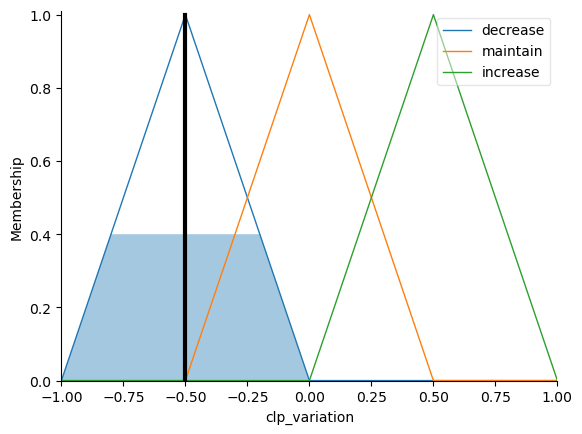

In [25]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definir as variáveis de entrada
memory_usage = ctrl.Antecedent(np.arange(0, 101, 1), 'memory_usage')
processor_load = ctrl.Antecedent(np.arange(0, 101, 1), 'processor_load')
input_network_throughput = ctrl.Antecedent(np.arange(0, 101, 1), 'input_network_throughput')
output_network_throughput = ctrl.Antecedent(np.arange(0, 101, 1), 'output_network_throughput')
output_bandwidth = ctrl.Antecedent(np.arange(0, 101, 1), 'output_bandwidth')
latency = ctrl.Antecedent(np.arange(0, 1001, 1), 'latency')

# Definir a variável de saída
clp_variation = ctrl.Consequent(np.arange(-1, 1.01, 0.01), 'clp_variation')


# Definir as funções de pertinência para cada variável
# Note: Os intervalos de pertinência e os termos usados podem variar dependendo do problema específico
memory_usage.automf(3, names=['low', 'medium', 'high'])
processor_load.automf(3, names=['low', 'medium', 'high'])
input_network_throughput.automf(3, names=['low', 'medium', 'high'])
output_network_throughput.automf(3, names=['low', 'medium', 'high'])
output_bandwidth.automf(3, names=['low', 'medium', 'high'])
latency.automf(3, names=['low', 'medium', 'high'])

# Agora, defina as funções de pertinência para a variável de saída
clp_variation['decrease'] = fuzz.trimf(clp_variation.universe, [-1  , -0.5, 0  ])
clp_variation['maintain'] = fuzz.trimf(clp_variation.universe, [-0.5, 0   , 0.5])
clp_variation['increase'] = fuzz.trimf(clp_variation.universe, [0   , 0.5 , 1  ])


# Definir as regras
rules = [
    ctrl.Rule(memory_usage['high'] | processor_load['high'], clp_variation['decrease']),
    ctrl.Rule(input_network_throughput['low'] & output_bandwidth['high'], clp_variation['increase']),
    # Adicione mais regras conforme 
]

# Criar o sistema de controlo
clp_control_system = ctrl.ControlSystem(rules)

# Criar o simulador
clp_simulator = ctrl.ControlSystemSimulation(clp_control_system)

# Atualizar as variáveis 
clp_simulator.input['memory_usage'] = 70
clp_simulator.input['processor_load'] = 60
clp_simulator.input['input_network_throughput'] = 50
#clp_simulator.input['output_network_throughput'] = 40
clp_simulator.input['output_bandwidth'] = 30
#clp_simulator.input['latency'] = 200

# Executar a simulação
clp_simulator.compute()

print(clp_simulator.output['clp_variation'])

# Ver o resultado da simulação de clp_variation, e o que sugere
clp_variation.view(sim=clp_simulator)

Example of how to create an "over time" FIS:

In [26]:
"""
# Assume inputs_over_time is a list of dictionaries, where each dictionary contains the input values for one time step
inputs_over_time = [{'memory_usage': 70, 'processor_load': 60, 'input_network_throughput': 50, 'output_bandwidth': 30, 'latency': 200}, ...]

for inputs in inputs_over_time:
    # Update variables
    for variable_name, value in inputs.items():
        clp_simulator.input[variable_name] = value

    # Run simulation
    clp_simulator.compute()

    print(clp_simulator.output['clp_variation'])

"""

"\n# Assume inputs_over_time is a list of dictionaries, where each dictionary contains the input values for one time step\ninputs_over_time = [{'memory_usage': 70, 'processor_load': 60, 'input_network_throughput': 50, 'output_bandwidth': 30, 'latency': 200}, ...]\n\nfor inputs in inputs_over_time:\n    # Update variables\n    for variable_name, value in inputs.items():\n        clp_simulator.input[variable_name] = value\n\n    # Run simulation\n    clp_simulator.compute()\n\n    print(clp_simulator.output['clp_variation'])\n\n"